In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
import cv2
from scipy.spatial import distance
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from tensorflow import keras
from keras.optimizers import rmsprop_v2

In [12]:
no_mask_path = "C:/Users/Tejas Rai/OneDrive/Desktop/ML_Projects/Face Mask Detection/archive/annotations"
mask_path = "C:/Users/Tejas Rai/OneDrive/Desktop/ML_Projects/Face Mask Detection/archive/images"

In [13]:
img_masks = []
lbl_masks = []
for i in os.listdir(mask_path):
    img = os.path.join(mask_path + "/", i)
    img_masks.append(img)
    lbl_masks.append("mask")   
image_no_mask = []
target_no_mask = []
for i in os.listdir(no_mask_path):
    img = os.path.join(no_mask_path + "/", i)
    image_no_mask.append(img)
    target_no_mask.append("without_mask")
mask_df = pd.DataFrame()
mask_df["image"] = img_masks
mask_df["target"] = lbl_masks
no_mask_df = pd.DataFrame()
no_mask_df["image"] = image_no_mask
no_mask_df["target"] = target_no_mask
df = pd.concat([mask_df, no_mask_df], axis = 0, ignore_index = True)
df = shuffle(df)
df

,image,target
771,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,mask
982,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,without_mask
1471,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,without_mask
458,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,mask
1384,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,without_mask
...,...,...
1158,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,without_mask
561,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,mask
1082,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,without_mask
802,C:/Users/Tejas Rai/OneDrive/Desktop/ML_Project...,mask


C:\Users\Tejas Rai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


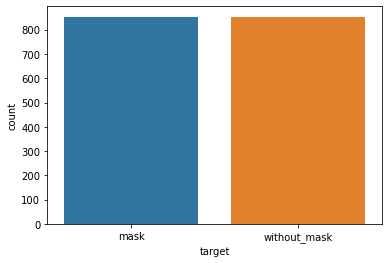

In [14]:
sns.countplot(df["target"]);

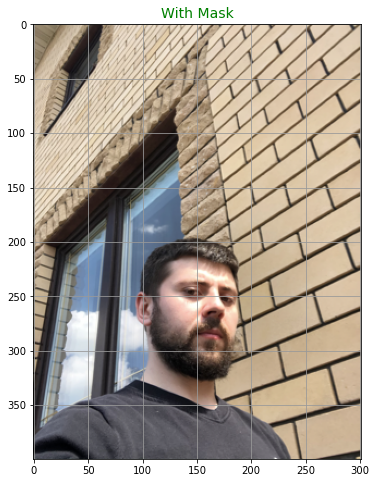

In [29]:
plt.figure(figsize=(12,8))
img = load_img(mask_df["image"][70])
plt.imshow(img)
plt.title("With Mask", color = "green", size = 14)
plt.grid(color='#999999', linestyle='-')
plt.show()

In [16]:
X_train = df.iloc[0:10000, ]
X_val = df.iloc[10001:11001, ]
X_test = df.iloc[11002:, ]

In [17]:
print("Train Seti:","\n",X_train["target"].value_counts(),"\n""Validation Seti: ","\n", X_val["target"].value_counts(), "\n"
      "Test Seti: ", "\n",X_test["target"].value_counts())

Train Seti: 
 mask            853
without_mask    853
Name: target, dtype: int64 
Validation Seti:  
 Series([], Name: target, dtype: int64) 
Test Seti:  
 Series([], Name: target, dtype: int64)


In [18]:
model1 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))
for layer in model1.layers:
    layer.trainable = False
model = models.Sequential()
model.add(model1)
model.add(layers.Flatten())
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

80134624/80134624 [==============================] - 29s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 1)                 8193      
                                                                 
Total params: 20,032,577
Trainable params: 8,193
Non-trainable params: 20,024,384
_________________________________________________________________
